# Menghao - fake news 

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [21]:
dataframe = pd.read_csv('downloaded_fake_news.csv')

# visual component 

In [22]:
dataframe

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [23]:
dataframe[dataframe['label'] == 'FAKE']

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,"Tehran, USA","I’m not an immigrant, but my grandparents are....",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [24]:
dataframe[dataframe['label'] == 'REAL']

,title,text,label
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [25]:
dataframe.iloc[0:4]

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE


In [26]:
dataframe['title']

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

  # Extension 1: different models

# SVM

In [27]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(dataframe['title'])
labels = dataframe['label']
print('features shape', features.shape)

kf = KFold(n_splits=5)

features shape (6335, 10071)


In [28]:
for train, test in kf.split(features):
    model = SVC()
    model.fit(features[train], labels.iloc[train])
    predicts = model.predict(features[test])
 
    print(classification_report(labels[test], predicts))

              precision    recall  f1-score   support

        FAKE       0.81      0.88      0.85       634
        REAL       0.87      0.79      0.83       633

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267

              precision    recall  f1-score   support

        FAKE       0.81      0.86      0.83       663
        REAL       0.84      0.77      0.80       604

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

              precision    recall  f1-score   support

        FAKE       0.78      0.87      0.82       595
        REAL       0.87      0.79      0.83       672

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

              preci

# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

for train, test in kf.split(features):
    model = LogisticRegression()
    model.fit(features[train], labels.iloc[train])
    # make predictions
    expected = labels[test]
    predicted = model.predict(features[test])
    
    print(classification_report(expected, predicted))
    print(metrics.recall_score(expected,predicted, average = None))

              precision    recall  f1-score   support

        FAKE       0.80      0.87      0.83       634
        REAL       0.86      0.78      0.82       633

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

[0.87066246 0.78199052]
              precision    recall  f1-score   support

        FAKE       0.80      0.85      0.82       663
        REAL       0.82      0.76      0.79       604

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267

[0.85067873 0.7615894 ]
              precision    recall  f1-score   support

        FAKE       0.77      0.86      0.81       595
        REAL       0.86      0.78      0.82       672

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82   

# LinearSVC

In [30]:
from sklearn.svm import LinearSVC

for train, test in kf.split(features):
    model = LinearSVC()
    model.fit(features[train], labels.iloc[train])
    predicted = model.predict(features[test])

    print(classification_report(labels[test], predicted))
    print(metrics.recall_score(expected,predicted, average = None))

              precision    recall  f1-score   support

        FAKE       0.82      0.83      0.82       634
        REAL       0.83      0.81      0.82       633

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267

[0.51242236 0.48796148]
              precision    recall  f1-score   support

        FAKE       0.80      0.79      0.80       663
        REAL       0.78      0.78      0.78       604

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267

[0.52018634 0.48314607]
              precision    recall  f1-score   support

        FAKE       0.79      0.83      0.81       595
        REAL       0.84      0.81      0.82       672

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82   

# MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
# Multinomial Naive Bayes Classifier  

for train, test in kf.split(features):
    model = MultinomialNB(alpha=1)  
    model.fit(features[train], labels.iloc[train])  
    predicted = model.predict(features[test])

    print(classification_report(labels[test], predicted))
    print(metrics.recall_score(expected,predicted, average = None))

              precision    recall  f1-score   support

        FAKE       0.87      0.78      0.82       634
        REAL       0.80      0.88      0.84       633

    accuracy                           0.83      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.84      0.83      0.83      1267

[0.45652174 0.55377207]
              precision    recall  f1-score   support

        FAKE       0.87      0.73      0.79       663
        REAL       0.75      0.88      0.81       604

    accuracy                           0.80      1267
   macro avg       0.81      0.80      0.80      1267
weighted avg       0.81      0.80      0.80      1267

[0.42080745 0.54093098]
              precision    recall  f1-score   support

        FAKE       0.83      0.77      0.80       595
        REAL       0.81      0.86      0.83       672

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82   

#  Extension 2:  A simple application to upload and test articles

In [32]:
def load_document(file_name):
    reader = open(file_name, 'r')          
    list_of_paras = []
    for line in reader:
        line = line.replace('\t','')
        list_of_paras.append(line.rstrip())
    return list_of_paras

# txt doc
data = load_document('123.txt')                                      # can personal change file's name here


'''
test_data = ['This is the first line.'
            'Here is the second one.'
            'And the third one.']
'''
data

["'This is the first line.'",
 "'Here is the second one.'",
 "'And the third one.'"]

In [33]:
#  example for csv doc's selected content

# data2 = pd.read_csv('file_name.csv')
# line_content = data2['title']


In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
feature_name = vectorizer.get_feature_names()
print('Vectorize word  frequncy')
print (X)
print ('All the feature names:',feature_name)
print('------------------------')
print('Matric show')
print (X.toarray())

Vectorize word  frequncy
  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 1)	1
  (0, 4)	1
  (1, 3)	1
  (1, 7)	1
  (1, 2)	1
  (1, 6)	1
  (1, 5)	1
  (2, 7)	1
  (2, 5)	1
  (2, 0)	1
  (2, 8)	1
All the feature names: ['and', 'first', 'here', 'is', 'line', 'one', 'second', 'the', 'third', 'this']
------------------------
Matric show
[[0 1 0 1 1 0 0 1 0 1]
 [0 0 1 1 0 1 1 1 0 0]
 [1 0 0 0 0 1 0 1 1 0]]


In [35]:
# use tf-idf method to track text features
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(vectorizer.fit_transform(data)) 

print('Matrix Feature:',tfidf.shape)
print('---------------')
print('TF-IDF Value')
print (tfidf)

Matrix Feature: (3, 10)
---------------
TF-IDF Value
  (0, 9)	0.5046113401371842
  (0, 7)	0.2980315863446099
  (0, 4)	0.5046113401371842
  (0, 3)	0.3837699307603192
  (0, 1)	0.5046113401371842
  (1, 7)	0.3154441510317797
  (1, 6)	0.5340933749435833
  (1, 5)	0.4061917781433946
  (1, 3)	0.4061917781433946
  (1, 2)	0.5340933749435833
  (2, 8)	0.5844829010200651
  (2, 7)	0.34520501686496574
  (2, 5)	0.444514311537431
  (2, 0)	0.5844829010200651


In [36]:
xaxis= [0.5046113401371842
  ,0.2980315863446099
  ,0.5046113401371842
 ,0.3837699307603192
  ,0.5046113401371842
 ,0.3154441510317797
  ,0.5340933749435833
  ,0.4061917781433946
  ,0.4061917781433946
  ,0.5340933749435833
  ,0.5844829010200651
 ,0.34520501686496574
,0.444514311537431
  ,0.5844829010200651]

In [37]:
yaxis = ['(0, 9)','(0, 7)','(0, 4)','(0, 3)','(0, 1)','(1, 7)','(1, 6)','(1, 5)','(1, 3)','(1, 2)','(2, 8)','(2, 7)','(2, 5)','(2, 0)']

<BarContainer object of 14 artists>

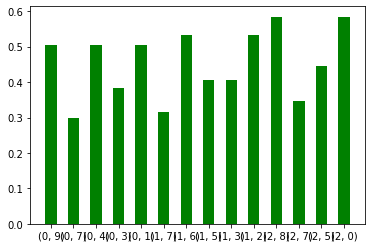

In [38]:
plt.bar(range(len(yaxis)),xaxis, width = 0.5, fc = 'g',tick_label=yaxis)